<a href="https://colab.research.google.com/github/kroniz-utab/Webinar-Upgrade-Skill-Intro-to-ML/blob/master/Messy_Clean_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import drive dari library google colab untuk menghubungkan dengan drive
from google.colab import drive

# hubungkan dengan google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# mengimport library os
import os
# mengatur dir untuk kaggle di gdrive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/my_kaggle"

In [ ]:
# memindahkan direktori file ke dalam folder my_kaggle
%cd /content/gdrive/My Drive/my_kaggle

# cek folder dan isi dari direktori
!ls

/content/gdrive/My Drive/my_kaggle
kaggle.json


In [ ]:
# mendownload semua dataset yang ada pada kaggle lalu menyimpan pada drive
# silahkan jadikan komentar seperti baris ini jika berhasil mendownload
# hal ini bertujuan untuk file tidak terdownload lagi ketika mengulangi runtime
# atau reset runtime

# !kaggle datasets download -d gmlmrinalini/manwomandetection
!ls

 92% 127M/138M [00:04<00:00, 25.9MB/s]
100% 138M/138M [00:04<00:00, 29.9MB/s]
kaggle.json  manwomandetection.zip


In [ ]:
# meng-unzip (mengekstrak file zip) pada drive, kemudian menghapus file zip pada drive
# lakukan hal yang sama seperti cell sebelumnya jika telah selesai
!unzip \*.zip  && rm *.zip
!ls

Archive:  manwomandetection.zip
  inflating: dataset/dataset/result/man/face_190.jpg  
  inflating: dataset/dataset/result/man/face_191.jpg  
  inflating: dataset/dataset/result/man/face_192.jpg  
  inflating: dataset/dataset/result/man/face_193.jpg  
  inflating: dataset/dataset/result/man/face_194.jpg  
  inflating: dataset/dataset/result/man/face_195.jpg  
  inflating: dataset/dataset/result/man/face_196.jpg  
  inflating: dataset/dataset/result/man/face_198.jpg  
  inflating: dataset/dataset/result/man/face_200.jpg  
  inflating: dataset/dataset/result/man/face_201.jpg  
  inflating: dataset/dataset/result/man/face_202.jpg  
  inflating: dataset/dataset/result/man/face_204.jpg  
  inflating: dataset/dataset/result/man/face_205.jpg  
  inflating: dataset/dataset/result/man/face_206.jpg  
  inflating: dataset/dataset/result/man/face_207.jpg  
  inflating: dataset/dataset/result/man/face_209.jpg  
  inflating: dataset/dataset/result/man/face_212.jpg  
  inflating: dataset/dataset/resu

In [ ]:
%cd /content/gdrive/My Drive/my_kaggle/dataset
!ls

/content/gdrive/My Drive/my_kaggle/dataset
dataset  result  test  train


In [ ]:
import os
base_dir = '/content/gdrive/My Drive/my_kaggle/dataset'
train_dir = os.path.join(base_dir,'train') # /content/gdrive/My Drive/my_kaggle/images/train
result_dir = os.path.join(base_dir,'result') # /content/gdrive/My Drive/my_kaggle/images/result

In [ ]:
os.listdir(train_dir)

['man', 'woman']

In [ ]:
os.listdir(result_dir)

['man', 'woman']

In [ ]:
# membuat direktori laki-laki pada direktori data train
train_man_dir = os.path.join(train_dir,'man')

# membuat direktori perempuan pada direktori data train
train_woman_dir = os.path.join(train_dir,'woman')

# membuat direktori laki-laki pada direktori data result
val_man_dir = os.path.join(validation_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data val
val_woman_dir = os.path.join(validation_dir,'messy')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    class_mode='binary')

result_generator = test_datagen.flow_from_directory(result_dir,
                                                        target_size=(150,150),
                                                        batch_size=4,
                                                        class_mode='binary')

Found 1615 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

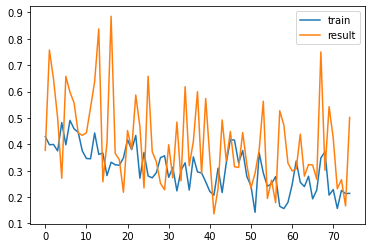

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','result'])
plt.show()

In [ ]:
%cd /content/gdrive/My Drive/my_kaggle/dataset/test
!ls

/content/gdrive/My Drive/my_kaggle/dataset/test
 man  'model A'   woman


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline
import glob


man


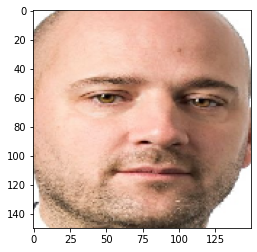

In [ ]:
model = load_model('/content/gdrive/My Drive/my_kaggle/dataset/Model_A')
picture = glob.glob('/content/gdrive/My Drive/my_kaggle/dataset/test/man/face_39.jpg')
for fn in picture:
  #predict image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  image = np.vstack([x])
  classes=model.predict_classes(image, batch_size=10)
  if classes == 0:
    print('man')
  else:
    print('woman')
